<h3>Implementation of Perceptron Network</h3>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

def step_function(x):
    return np.where(x>0 , 1, 0)

class perceptron:
    def __init__(self , lr = 0.1, n_iter = 1000 ):
        self.lr = lr
        # self.feature_count = X.shape[1]
        # self.input_count = X.shape[0]
        self.n_inter = n_iter
        self.activation_fun = step_function
        self.weight = None
        self.bias = None

    def fit(self , X , y):
        feature_count = X.shape[1]
        input_count = X.shape[0]

        # intlisize weight and bias
        np.random.seed(0)
        self.weight = np.random.rand(feature_count)
        self.bias = np.random.rand(1)

        y = np.where(y>0 , 1, 0)

        # update weight an bias
        for _ in range(self.n_inter):

            for i in range(input_count):
                y_cap = self.activation_fun((np.dot(X[i] , self.weight) + self.bias))

                if y[i] != y_cap:
                    update = (self.lr*(y[i] - y_cap))

                    self.weight += update*X[i]
                    self.bias += update
    
    def predict(self , X):
        y_cap = self.activation_fun((np.dot(X , self.weight) + self.bias))
        return y_cap
    



In [8]:
# Make and split dataset
X , y = datasets.make_blobs(n_samples= 200 , n_features= 2 , centers= 2 , random_state= 3)
X_train, X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2  , random_state= 42)

# appply the perceptron learning
p = perceptron(lr = 0.01, n_iter= 1000)
p.fit(X_train , y_train)
y_pred = p.predict(X_test)

print("Accuracy score is : " , accuracy_score(y_test , y_pred))

Accuracy score is :  1.0


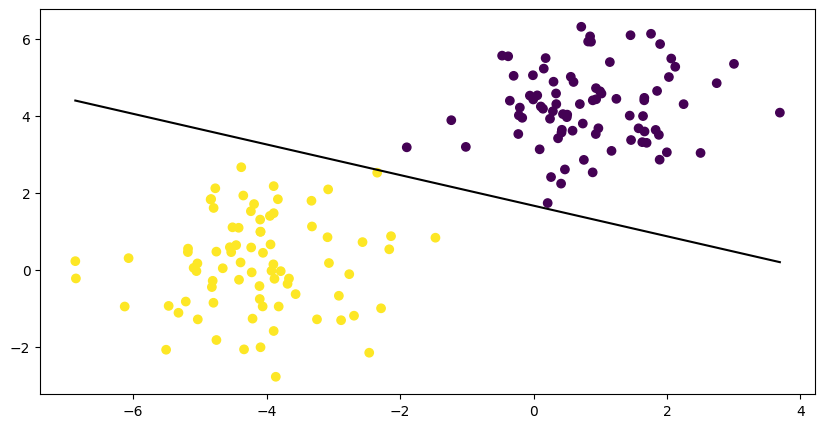

In [15]:
# plot a graph
plt.figure(figsize=(10 ,5))
y_train = np.where(y_train>0 , 1, 0)

plt.scatter(X_train[: , 0] , X_train[: , 1] , c= y_train  , marker= 'o')

x0_1 = np.amin(X_train[: , 0])
x0_2 = np.amax(X_train[: , 0])

x1_1 = (-p.weight[0]*x0_1 - p.bias)/p.weight[1]
x1_2 = (-p.weight[0]*x0_2 - p.bias)/p.weight[1]

plt.plot([x0_1 , x0_2] , [x1_1  , x1_2] , "k")